### Grain Size Heatmap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from grainsize import GrainSize

First, we'll define the matrix of grain size fractions based on the grain size data frame.

In [2]:
sr19 = GrainSize(dataframe=pd.read_csv("../data-files/gs-files/sr19-gs-complete.csv", index_col=0))
sr19.dataframe = sr19.dataframe[sr19.dataframe.index <= 263]

In [ ]:
# build matrix
z = sr19.dataframe.values.astype(float)
gs_bins = sr19.dataframe.columns.values.astype(float)
depth_bins = sr19.dataframe.index.values.astype(float)

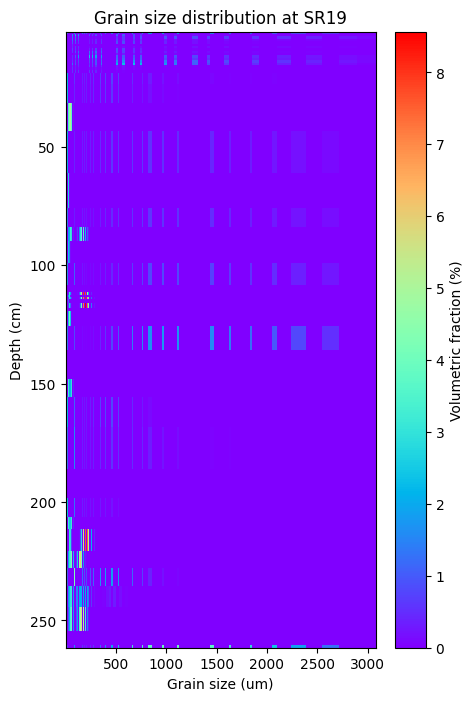

In [6]:
# plotting the heatmap
fig, ax = plt.subplots(figsize=(5, 8))
mesh = ax.pcolormesh(
    gs_bins,
    depth_bins,
    z,
    shading="auto",
    cmap="rainbow")
fig.colorbar(mesh, ax=ax, label="Volumetric fraction (%)")

ax.set_xlabel("Grain size (um)")
ax.set_ylabel("Depth (cm)")
ax.set_title("Grain size distribution at SR19")
ax.yaxis.set_inverted(True)